In [1]:
import psi4
import numpy as np
from scipy import ndimage
import libcubeprop
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#We can bring the cubefile as a Numpy array
vp, cube_info = libcubeprop.cube_to_array("tests/formic.cube")

In [3]:
vp.shape

(80, 64, 100)

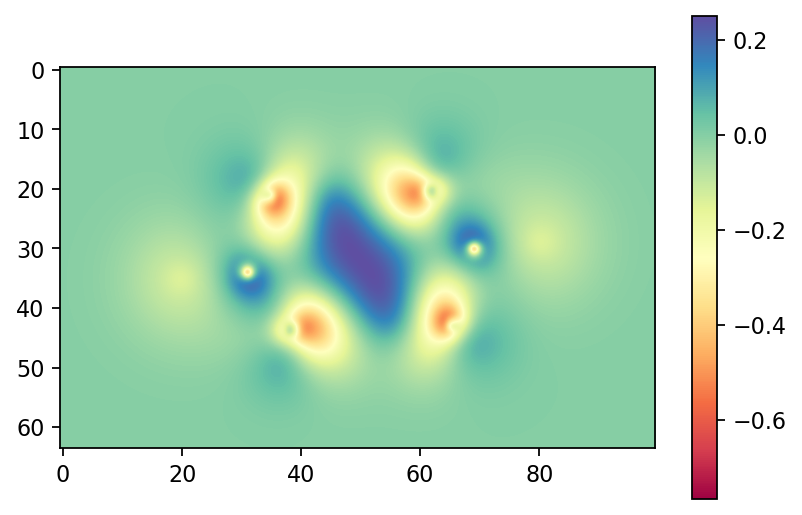

In [5]:
#And using Matplotlib we can compute the electron density of a slice
fig, ax = plt.subplots(1,1, dpi=160)

#Rotate the image to match the previously shown models.
# rotated_img = ndimage.rotate(h2o_cube[15:50,43,20:50], -90)

#Plot the grid interpolating using a bicubic method. 
p = ax.imshow(vp[40,:,:], interpolation="bicubic", cmap="Spectral")
fig.colorbar(p, ax=ax)